# Web Scraping

<img src='imagenes/cliente_serv.png' width=700>

## Cuestiones basicas

In [1]:
import requests

url = 'http://www.google.com/search?start=0&num=+'str(num)'+&q=rofex'
html = requests.get(url)

print(html)

<Response [200]>


Que es ese objeto response?

'<!doctype html><html lang="es-419"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>rofex - Buscar con Google</title><script nonce="p5MGiQaUs4RN9CI070FHdg==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||
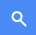
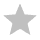
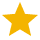
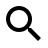
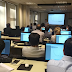
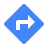

In [2]:
html.text

## Librerias para scraping

In [3]:
from bs4 import BeautifulSoup

search = 'rofex'
start = 0
end = 50

agents = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
agents += "AppleWebKit/537.36 (KHTML, like Gecko) "
agents += "Chrome/91.0.4472.77 "
agents += "Safari/537.36"

h = {"user-agent": agents}

url = 'http://www.google.com/search?start='+str(start)+'&num='+str(end)+'&q='+search
html = requests.get(url, headers=h).text

soup = BeautifulSoup(html)

# Buscando todos los elementos de determinado TAG <h3> con una clase o id ".LC20lb DKV0Md"
titulos = soup.findAll("h3", {"class": "LC20lb DKV0Md"})

# Por lista por comprension, con un selector css "div.yuRUbf > a"
links = [link['href'] for link in soup.select('div.yuRUbf > a')]

titulos[:20]

[<h3 class="LC20lb DKV0Md">Matba-Rofex: Home</h3>,
 <h3 class="LC20lb DKV0Md">Matba - Rofex</h3>,
 <h3 class="LC20lb DKV0Md">MatbaRofex Realtime</h3>,
 <h3 class="LC20lb DKV0Md">DataCenter | MATba Rofex</h3>,
 <h3 class="LC20lb DKV0Md">Inicio | Matba Rofex - FCI</h3>,
 <h3 class="LC20lb DKV0Md">Noticias sobre: Rofex: Hoy 06-06 | Noticias económicas ...</h3>,
 <h3 class="LC20lb DKV0Md">Matba Rofex en Bolsa de Cereales</h3>,
 <h3 class="LC20lb DKV0Md">Cursos | Matba Rofex School</h3>,
 <h3 class="LC20lb DKV0Md">Sueldos en Rofex | Glassdoor</h3>,
 <h3 class="LC20lb DKV0Md">Matba Rofex | LinkedIn</h3>,
 <h3 class="LC20lb DKV0Md">Comunicación N°160 MÁRGENES CONTRATOS ...</h3>,
 <h3 class="LC20lb DKV0Md">Matba Rofex School | Aprendé De Los Expertos Del Mercado</h3>,
 <h3 class="LC20lb DKV0Md">GUIA ROFEX NUEVA - Portfolio Personal</h3>,
 <h3 class="LC20lb DKV0Md">Rofex | Bull Market Brokers</h3>,
 <h3 class="LC20lb DKV0Md">Invertir en rofex, aprendé a comprar y operar rofex | BMB</h3>,
 <h3 c

In [4]:
links[:10]

['https://www.matbarofex.com.ar/',
 'https://matbarofex.primary.ventures/',
 'https://matbarofex.primary.ventures/futuros/agropecuarios',
 'http://datacenter.matba.com.ar/',
 'https://mercadofci.rofex.com.ar/',
 'https://www.cronista.com/tema/rofex/',
 'https://www.bolsadecereales.com/ver-matba-rofex-984',
 'https://www.mtrschool.com.ar/cursos/',
 'https://www.glassdoor.com.ar/Sueldo/Rofex-Sueldos-E2253757.htm',
 'https://ar.linkedin.com/company/matbarofex']

## Con pandas

In [5]:
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/AAPL/apple/price-book'
data = pd.read_html(url)[0]
data.columns = data.columns.droplevel()
data

,Date,Stock Price,Book Value per Share,Price to Book Ratio
0,2021-06-08,126.74,NaN,30.57
1,2021-03-31,121.94,$4.15,29.41
2,2020-12-31,132.27,$3.94,33.60
3,2020-09-30,115.24,$3.85,29.94
4,2020-06-30,90.59,$4.22,21.48
...,...,...,...,...
57,2007-03-31,2.85,$0.51,5.63
58,2006-12-31,2.61,$0.47,5.59
59,2006-09-30,2.36,$0.42,5.67
60,2006-06-30,1.76,$0.39,4.50


## bs4

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


r = requests.get("http://www.feriadeeditores.com.ar/fedvirtual/")

soup = BeautifulSoup(r.content)
tags_a = soup.find_all('a', class_='icon brands fa-facebook-f')


fb = []
for link in tags_a:
    fb.append(link['href'])
    
df = pd.DataFrame(fb, columns=['FB'])
df.to_excel('facebooks.xlsx')
df

,FB
0,https://www.facebook.com/feriadeeditores
1,https://www.facebook.com/edicionesabrancancha
2,https://www.facebook.com/abreculturapuntocom/
3,http://facebook.com/adrianahidalgoeditora
4,http://facebook.com/editorial.alquimia
...,...
140,http://www.facebook.com/trenenmovimiento.edici...
141,http://www.facebook.com/trencheditora
142,https://www.facebook.com/uraniaediciones/
143,http://facebook.com/waldeneditora


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


r = requests.get("https://www.cronista.com")

soup = BeautifulSoup(r.content)

l = [link.text for link in soup.find_all('a') if len(link.text) > 50]
l[:30]

['El dólar blue volvió a caer y los financieros siguieron la tendencia',
 'China busca producir en Argentina un millón de vacunas Sinopharm por semana',
 'Coronavirus: volvieron a subir los casos y la Argentina pasó los 4 millones de contagiados',
 'Suben las reservas y crece el apetito por las obligaciones negociables en dólares',
 'Freno al Merval: hubo toma de ganancias y la Bolsa cayó 2,6%',
 'Lanzan plan para reconvertir el casco histórico porteño con residencias estudiantiles',
 'Rodríguez Larreta se empadronó para la vacuna y se despega de los "vip"',
 'Las vacunas llegan a Ezeiza y las dudas, a Escobar y Bahía Blanca',
 'Pfizer le ofreció al Gobierno un contrato por 13 millones de vacunas contra el coronavirus',
 'Ganancias: a dos meses de la sanción de la ley, las empresas esperan por una norma clave',
 '"Mochila argentina": la propuesta de un empresario para bajar las indemnizaciones y crear puestos de trabajo',
 'La oferta que Macri rechazó para\xa0dolarizar la economía: hoy

## Scraping "mas complejo"

* Selenium: Se manipula al driver del navegador
    * Se pueden desencadenar eventos
    * Se puede manejar asincronismo
    * Se hace creer al servidor que del otro lado hay un humano usando el navegador, basicamente no tiene forma de darse cuenta porque el script usa una GUI y una UX exactamente igual a la que usa un humano

* Ingeniería Inversa:
    * Todas las páginas usan alguna tecnología para volcar datos en la inerfaz que ve el usuario (navegador), lo que pasa es que a veces no es instantáneo cuando se hace la primera petición al servidor, esto es por varios motivos:
        * Streaming de datos en vivo
        * Tecnologías que manipulan el DOM y dan feedback por ej REACT
        * Asincronismo como por ej AJAX
        
    La gracia entonces es ir yendo hacia atrás para ver cuando el navegador pide datos a algun servidor y logicamente encontrar que request hace y a que servidor

# Scraping vs APIs

<img src='imagenes/scraping_apis.jpg' width=700>

## Scraping 

Desventajas para el cliente:

    * Mucho laburo preparar el barrido de datos, sujeto a errores y bugs
    * Dificil mantenibilidad

    
Desventajas para el Servidor:

    * Consumo ineficiente de ancho de banda (se bajan muchos recursos innecesarios)
    * Mala analítica de datos web (confunden tráfico con bots)

    
## APIs

Ventajas para el cliente:
    
    * Mas facil y rápidos requests
    * Mejor mantenibilidad y escalabilidad de los proyectos
    
Ventajas para el servidor:
    
    * Integración horizontal de servicios web gracias a desarrollos de 3ros
    * Mejor uso de recursos, mejor medición y control de analíticas de usuarios (gracias a API_Keys)

# APIs

Son un punete entre usuario/consumidor de datos y las bases de datos, no solo para lectura sino tambien escritura

## Algunas Apis financieras que usaremos

En las tablas me faltaron algunas muy piolas como:

    * TDA Ameritrade: uno de los brokers mas grandes de USA, tiene opciones en real time
    * Tiingo(webSocket de equity, fx y crypto)
    * FED (Deuda, Securities: Bills/Notes/Bonds, Hojas de balances de a Fed etc)

<img src='imagenes/APIs_tabla.png' width='1000'>

### ¿Conviene usar una libreria o paquete o usar las APIs con funciones propias?

Conviene siempre, saber usar las APIs a "modo manual" es decir armando ustedes mismos las funciones y les pongo algunos por que:

#### Actualizacion
* Porque a veces actualizan las APIs y no los paquetes, con lo cual nos perdemos "potencia" de API por usarla del paquete

#### Personalización y parametrización
* Porque muchas veces necesitamos personalizar alguna función con algún parámetro extra que el paquete no lo brinda y nos terminamos limitando o haciendo un código menos eficiente

#### Mantenimiento y calidad
* Porque si bien uno se puede fijar las "estrellas" que tiene el repositorio del paquete que baja, muchas veces tienen bugs que no se notan o no tiran error y puede ser un problemón

### Tipos de APIs y Auth

* APIs públicas 100% (Fed)


* APIs mixtas  (Típico de las APIs de cryptos)
    * Endpoints públicos para marketData
    * Endpoints privados para manejo de cuenta
    
    
* APIs privadas
    * Auth por token simple en request GET  (IEX, FPM, Alpha Vantage, Finnhub)
    * Auth por token o par de tokens en encabezados con metodos POST o combinacion POST/GET  (Rofex)
    * Auth con tokens que expiran cada tanto y hay que ir renovandolos  (IOL, Deribit)
    * Auth con inicio de session (HitBTC)
    * Auth con firma encriptada (FTX)

# Glosario básico

Acostúmbrense a esas palabritas porque las vamos a nombrar un montón a partir de ahora
* Endpoint: Es una URL (dirección web) a la que vamos a apuntar para que me devuelva un dato
* Llamados/Requests: Es la acción de entrar a esa URL
* Response: Es la respuesta de la API a ese llamado
* StatusCode: Es un código estandarizado que nos devuelve junto con el Response (abajo los explico mejor)
* Servidor: Es la compu de la API
* Cliente: Es la compu nuestra o nuestro programa que hace el request
* Credenciales: Son las claves o tokens de autenticación
* Body: Es el cuerpo de los mensajes (contenido) entre cliente y servidor
* Headers: Son encabezados de los mensajes entre cliente y servidor (A veces aqui viajan las credenciales)
* Parametros: Son justamente los parámetros (variables) que necesita el endpoint que le mandemos en el mensaje, hay  opcionales y obligatorios
* SandBox: Son ambientes de prueba, para testear las funciones sin efecto real (como un simulador)
* POST, GET, PATCH, DELETE, UPDATE: Son los principales métodos de comunicación cliente/servidor, a grandes rasgos GET es el mas comun, POST es mas seguro y se usa para autenticación o para envío de info sensible ya que cuando viaja por GET podría ser interceptada mas facilmente

### Rate Limits

* Por dia, mes, semana
* Por minuto, segundo
* Ponderados según "peso" de cada endpoint
* Por token o por IP

### Status Code

Si bien ya vamos a ver mas adelante que pasa cuando falla una conexión y esas cosas, voy dejando por acá que es la parte de generalidades una tabla de códigos de respuesta Http, que nos devuelven todas las APIs a cada llamada salga bien o mal justamente diciendo eso (si salio bien o mal) y un mínimo estandar que nos orienta de donde está la falla en caso de haberla

<img src='imagenes/status2.png' width=500>

In [8]:
requests.get('https://google.com/cualquiera').status_code

404

# API AlphaVantage

## Leemos la documentacion

Ir a https://www.alphavantage.co y pedir su "api_key"

In [9]:
apikey = '2RG2NEF3IPXMIPX3'
apikey = '09QXTWMZ1UBWMPO8'
apikey = '09QXTWMZ1UBWMPO8'
apikey = 'N9P0QSV7X9VSJXV4'

## Primer request a un endpoint

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=15min&apikey=2RG2NEF3IPXMIPX3

Como verán es la serie de precios intradiarios, y me da una serie de parámetros obligatorios:
* function: El nombre de la función (en esta API es obligatorio siempre este parámetro)
* symbol: El ticker por ejemplo "AAPL"
* interval: El intervalo entre cada vela (1min, 5min, 15min, 30min 60min)
* apikey: Es nuestra clave, o token como definimos antes
<br><br>Y una serie de parámetros optativos:
* outputsize: Compacto o Full (aclara que  por default compacto devuelve solo 100 datos)
* datatype: Nos da la posibilidad de descargarlo en un CSV (tipo excel) o devolver un JSON (texto que leerá python), por default es JSON y es lo que siempre vamos a usar, a menos que sen la API para descargarse excels, pero no tendría mucho sentido

Bueno, antes de codear esto, vamos a aclarar una cosa, como dijimos un request de una API REST es ni mas ni menos como visitar una pagina web, asi que estos parámetros los podríamos poner en la barra del navegador web y tendría que funcionar, veamos un ejemplo, vamos a usar esta API para saber los precios intradiarios de AAPL en velas de 15 minutos

LA URL base es: https://www.alphavantage.co/query

Luego le debemos poner los parámetros, para ello:
* Al primer parámetro lo antecedemos por el signo "?"
* Y para concaternar los otros usamos el signo "&"

Entonces la URL final quedaría asi:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=15min&apikey=2RG2NEF3IPXMIPX3

Así que veamos como sería eso, vamos a empezar por la manera mas burda de hacerlo y después lo emprolijamos


Vamos a tener importar tres librerías:


* requests: Para hacer el llamado HTTP a la API
* pandas: Para guardar los datos en un DataFrame


Obviamente solo necesito la librería requests para comunicarme con la API el resto es para trabajar con los datos que me devuelve

## Armamos código o instrucciones para automatizar el request

In [10]:
#Importamos las librerías
import pandas as pd
import requests

#Definimos las variables (parámetros)
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '15min'
token = "2RG2NEF3IPXMIPX3"


# https://www.alphavantage.co/query?
#function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&outputsize=full&apikey=demo
    
# Concateno la URL a visitar:
urlBase = 'https://www.alphavantage.co/query'
url = urlBase+'?function='+function
url += '&symbol='+ symbol
url += '&interval='+interval
url += '&outputsize=compact'
url += '&apikey='+apikey

# Acá hago el llamado/Request
r = requests.get(url)

print(r)

<Response [200]>


## Inspeccionamos el response

Bien, pero lo que vemos ahi cuando imprimimos el response, ¿que es?
<br>Es un objeto response de la librería requests, que obviamente tiene varios elementos y funciones:
* text o content: Es el texto plano como lo vemos en la web
* headers: Los encabezados
* status_code: Como vimos el código que ya vimos que es 200, es decir que la comunicación esta ok
* url: la url 
* cookies: Las cookies
* json(): El método para obtener el objeto json, o diccionario del contenido

Veamos algun ejemplo:

In [11]:
r.url

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=15min&outputsize=compact&apikey=N9P0QSV7X9VSJXV4'

In [12]:
r.cookies

<RequestsCookieJar[]>

In [13]:
r.status_code

200

In [14]:
r.headers

{'Date': 'Tue, 08 Jun 2021 23:12:32 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Frame-Options': 'SAMEORIGIN', 'Vary': 'Cookie', 'Allow': 'GET, HEAD, OPTIONS', 'Via': '1.1 vegur', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '0a8f7f36580000f7b60904a000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '65c5ce36f806f7b6-EZE', 'Content-Encoding': 'gzip'}

### Obtenemos la data que buscamos

In [17]:
print(r.text)

{
    "Meta Data": {
        "1. Information": "Intraday (15min) open, high, low, close prices and volume",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2021-06-07 20:00:00",
        "4. Interval": "15min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (15min)": {
        "2021-06-07 20:00:00": {
            "1. open": "125.9200",
            "2. high": "125.9800",
            "3. low": "125.8900",
            "4. close": "125.9600",
            "5. volume": "19496"
        },
        "2021-06-07 19:45:00": {
            "1. open": "125.9200",
            "2. high": "125.9400",
            "3. low": "125.9000",
            "4. close": "125.9299",
            "5. volume": "14009"
        },
        "2021-06-07 19:30:00": {
            "1. open": "125.8900",
            "2. high": "125.9700",
            "3. low": "125.8400",
            "4. close": "125.9100",
            "5. volume": "27226"
        },
        "2021-06-0

### La pasamos a un formato manipulable

In [16]:
r.json()

{'Meta Data': {'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2021-06-07 20:00:00',
  '4. Interval': '15min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (15min)': {'2021-06-07 20:00:00': {'1. open': '125.9200',
   '2. high': '125.9800',
   '3. low': '125.8900',
   '4. close': '125.9600',
   '5. volume': '19496'},
  '2021-06-07 19:45:00': {'1. open': '125.9200',
   '2. high': '125.9400',
   '3. low': '125.9000',
   '4. close': '125.9299',
   '5. volume': '14009'},
  '2021-06-07 19:30:00': {'1. open': '125.8900',
   '2. high': '125.9700',
   '3. low': '125.8400',
   '4. close': '125.9100',
   '5. volume': '27226'},
  '2021-06-07 19:15:00': {'1. open': '125.8700',
   '2. high': '125.9000',
   '3. low': '125.8100',
   '4. close': '125.9000',
   '5. volume': '16791'},
  '2021-06-07 19:00:00': {'1. open': '125.9100',
   '2. high': '125.9300',
   '3. low': '125.8000',
   '4. close

In [18]:
mi_dicc = r.json()

In [19]:
mi_dicc['Meta Data']

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2021-06-07 20:00:00',
 '4. Interval': '15min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [20]:
mi_dicc['Time Series (15min)']

{'2021-06-07 20:00:00': {'1. open': '125.9200',
  '2. high': '125.9800',
  '3. low': '125.8900',
  '4. close': '125.9600',
  '5. volume': '19496'},
 '2021-06-07 19:45:00': {'1. open': '125.9200',
  '2. high': '125.9400',
  '3. low': '125.9000',
  '4. close': '125.9299',
  '5. volume': '14009'},
 '2021-06-07 19:30:00': {'1. open': '125.8900',
  '2. high': '125.9700',
  '3. low': '125.8400',
  '4. close': '125.9100',
  '5. volume': '27226'},
 '2021-06-07 19:15:00': {'1. open': '125.8700',
  '2. high': '125.9000',
  '3. low': '125.8100',
  '4. close': '125.9000',
  '5. volume': '16791'},
 '2021-06-07 19:00:00': {'1. open': '125.9100',
  '2. high': '125.9300',
  '3. low': '125.8000',
  '4. close': '125.8700',
  '5. volume': '24319'},
 '2021-06-07 18:45:00': {'1. open': '125.9600',
  '2. high': '125.9700',
  '3. low': '125.9000',
  '4. close': '125.9000',
  '5. volume': '15828'},
 '2021-06-07 18:30:00': {'1. open': '125.9400',
  '2. high': '126.0000',
  '3. low': '125.9300',
  '4. close': '

### La pasamos a dataframe

In [23]:
datos = r.json()['Time Series (15min)']

pd.DataFrame(datos).transpose()

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,125.9200,125.9800,125.8900,125.9600,19496
2021-06-07 19:45:00,125.9200,125.9400,125.9000,125.9299,14009
2021-06-07 19:30:00,125.8900,125.9700,125.8400,125.9100,27226
2021-06-07 19:15:00,125.8700,125.9000,125.8100,125.9000,16791
2021-06-07 19:00:00,125.9100,125.9300,125.8000,125.8700,24319
...,...,...,...,...,...
2021-06-04 12:15:00,125.1100,125.3400,124.9800,125.3200,2036828
2021-06-04 12:00:00,125.1339,125.1700,125.0500,125.1000,1220528
2021-06-04 11:45:00,125.3700,125.3850,125.0200,125.1350,3779380
2021-06-04 11:30:00,125.1100,125.3750,125.1100,125.3687,2230566


In [24]:
data = r.json()['Time Series (15min)']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,125.9200,125.9800,125.8900,125.9600,19496
2021-06-07 19:45:00,125.9200,125.9400,125.9000,125.9299,14009
2021-06-07 19:30:00,125.8900,125.9700,125.8400,125.9100,27226
2021-06-07 19:15:00,125.8700,125.9000,125.8100,125.9000,16791
2021-06-07 19:00:00,125.9100,125.9300,125.8000,125.8700,24319
...,...,...,...,...,...
2021-06-04 12:15:00,125.1100,125.3400,124.9800,125.3200,2036828
2021-06-04 12:00:00,125.1339,125.1700,125.0500,125.1000,1220528
2021-06-04 11:45:00,125.3700,125.3850,125.0200,125.1350,3779380
2021-06-04 11:30:00,125.1100,125.3750,125.1100,125.3687,2230566


## ¿QUE FALTA?

* Emprolijar código
* Mecanismo para evitar errores (API/Usuario)
* Meter todo el código en una función
* Que el dataframe esté ordenado cronologicamente
* Que el dataframe tenga valores numéricos
* Estandarizar los nombres de columnas del dataframe

### Emprolijamos el código

Pasando en limpio un poco el código, en lugar de concatenar la URL entera con todos los parámetros, lo que podemos hacer, y es una buena práctica hacer, es mandar todos los parámetros como parámetros del rrequest en lugar de mandarlos concatenando la URL

In [25]:
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '15min'
size = 'compact'
token = "2RG2NEF3IPXMIPX3"

url = 'https://www.alphavantage.co/query'

parametros = {'function' : function, 'symbol': symbol, 'interval': interval, 
              'outputsize': size, 'apikey': token}

# r = requests.get(url, data = parametros)
# r = requests.get(url, json = parametros)
r = requests.get(url, params=parametros)

data = r.json()['Time Series (15min)']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,125.9200,125.9800,125.8900,125.9600,19496
2021-06-07 19:45:00,125.9200,125.9400,125.9000,125.9299,14009
2021-06-07 19:30:00,125.8900,125.9700,125.8400,125.9100,27226
2021-06-07 19:15:00,125.8700,125.9000,125.8100,125.9000,16791
2021-06-07 19:00:00,125.9100,125.9300,125.8000,125.8700,24319
...,...,...,...,...,...
2021-06-04 12:15:00,125.1100,125.3400,124.9800,125.3200,2036828
2021-06-04 12:00:00,125.1339,125.1700,125.0500,125.1000,1220528
2021-06-04 11:45:00,125.3700,125.3850,125.0200,125.1350,3779380
2021-06-04 11:30:00,125.1100,125.3750,125.1100,125.3687,2230566


### Provoquemos error con el timeframe

In [26]:
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '5min'
size = 'compact'
token = "2RG2NEF3IPXMIPX3"

url = 'https://www.alphavantage.co/query'

parametros = {'function' : function, 'symbol': symbol, 'interval': interval, 
              'outputsize': size, 'apikey': token}

r = requests.get(url, params=parametros)

data = r.json()[f'Time Series ({interval})']
dataDF = pd.DataFrame.from_dict(data, orient='index')
dataDF.head()

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,125.9600,125.9800,125.9100,125.9600,8678
2021-06-07 19:55:00,125.9500,125.9800,125.9100,125.9100,6650
2021-06-07 19:50:00,125.9200,125.9500,125.8900,125.9500,4168
2021-06-07 19:45:00,125.9300,125.9300,125.9000,125.9299,3465
2021-06-07 19:40:00,125.9299,125.9400,125.9200,125.9300,1636


Y para terminar lo podemos meter en una función

### Arreglamos el error del intervalo o timeframe en forma genérica

In [29]:
def getIntra(function, symbol, size, token, t):    
    
    """
    params: 
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI)
    """
    
    interval = f"{t}min"
    url = 'https://www.alphavantage.co/query'
    
    parametros = {'function' : function, 'symbol': symbol, 'interval': interval, 
                  'outputsize': size, 'apikey': token}

    r = requests.get(url, params=parametros)
    data = r.json()[f'Time Series ({interval})']
    dataDF = pd.DataFrame.from_dict(data, orient='index')
    
    return dataDF

In [28]:
help(getIntra)

Help on function getIntra in module __main__:

getIntra(function, symbol, size, token, t)
    params: 
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI)



In [30]:
data = getIntra(function="TIME_SERIES_INTRADAY", symbol="YPF", t=15, size="compact", token=apikey)
data

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 18:30:00,5.7000,5.7000,5.7000,5.7000,600
2021-06-07 16:15:00,5.6900,5.6900,5.6600,5.6600,35712
2021-06-07 16:00:00,5.6999,5.7100,5.6500,5.6638,447418
2021-06-07 15:45:00,5.6850,5.7235,5.6800,5.6950,205761
2021-06-07 15:30:00,5.6300,5.6900,5.6200,5.6850,91560
...,...,...,...,...,...
2021-06-02 14:45:00,4.9050,4.9250,4.9000,4.9150,33260
2021-06-02 14:30:00,4.9000,4.9300,4.9000,4.9050,62749
2021-06-02 14:15:00,4.9000,4.9220,4.9000,4.9100,54327
2021-06-02 14:00:00,4.9150,4.9200,4.9000,4.9050,73271


### Provoquemos otro error...

In [26]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='AAAPL', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data

KeyError: 'Time Series (5min)'

¿Soluciones?  escucho ideas..

In [32]:
def getIntra(function, symbol, size, token, t):    
    
    """
    params: 
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI)
    """
    
    interval = f"{t}min"
    url = 'https://www.alphavantage.co/query'
    
    parametros = {'function' : function, 'symbol': symbol, 'interval': interval, 
                  'outputsize': size, 'apikey': token}

    r = requests.get(url, params=parametros)

    try:
        data = r.json()[f'Time Series ({interval})']
        dataDF = pd.DataFrame.from_dict(data, orient='index')
    except:
        dataDF = pd.DataFrame()
        print('Ojo que esta fallando el request \n\nRespuesta de la API:\n', r.text)
        
    return dataDF

In [33]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='adasdasd', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data


Ojo que esta fallando el request 

Respuesta de la API:
 {
    "Error Message": "Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY."
}


""


### Ojo siempre con los tipos

In [34]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='AAPL', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data.round(2).head()

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,125.9600,125.9800,125.9100,125.9600,8678
2021-06-07 19:55:00,125.9500,125.9800,125.9100,125.9100,6650
2021-06-07 19:50:00,125.9200,125.9500,125.8900,125.9500,4168
2021-06-07 19:45:00,125.9300,125.9300,125.9000,125.9299,3465
2021-06-07 19:40:00,125.9299,125.9400,125.9200,125.9300,1636


In [32]:
type(data.iloc[0]['1. open'])

str

¿Que onda? no redondéo nada..

In [36]:
data = data.astype('float')

data.round(1).head()

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,126.0,126.0,125.9,126.0,8678.0
2021-06-07 19:55:00,126.0,126.0,125.9,125.9,6650.0
2021-06-07 19:50:00,125.9,126.0,125.9,126.0,4168.0
2021-06-07 19:45:00,125.9,125.9,125.9,125.9,3465.0
2021-06-07 19:40:00,125.9,125.9,125.9,125.9,1636.0


In [34]:
pd.to_numeric(data['5. volume'])

2021-06-07 20:00:00      8678.0
2021-06-07 19:55:00      6650.0
2021-06-07 19:50:00      4168.0
2021-06-07 19:45:00      3465.0
2021-06-07 19:40:00      1636.0
                         ...   
2021-06-07 12:05:00    544337.0
2021-06-07 12:00:00    540296.0
2021-06-07 11:55:00    579731.0
2021-06-07 11:50:00    480514.0
2021-06-07 11:45:00    832870.0
Name: 5. volume, Length: 100, dtype: float64

In [38]:
data = getIntra(function='TIME_SERIES_INTRADAY', symbol='AAPL', t=5,
                size='compact', token="2RG2NEF3IPXMIPX3")

data.apply(pd.to_numeric)

,1. open,2. high,3. low,4. close,5. volume
2021-06-07 20:00:00,125.9600,125.980,125.91,125.9600,8678
2021-06-07 19:55:00,125.9500,125.980,125.91,125.9100,6650
2021-06-07 19:50:00,125.9200,125.950,125.89,125.9500,4168
2021-06-07 19:45:00,125.9300,125.930,125.90,125.9299,3465
2021-06-07 19:40:00,125.9299,125.940,125.92,125.9300,1636
...,...,...,...,...,...
2021-06-07 12:05:00,125.0050,125.090,124.99,125.0150,544337
2021-06-07 12:00:00,124.9900,125.020,124.96,125.0050,540296
2021-06-07 11:55:00,125.0200,125.060,124.95,124.9750,579731
2021-06-07 11:50:00,124.9559,125.060,124.95,125.0150,480514


# Tips para descargar series de datos de precios de activos

* TIPOS NUMERICOS, estandarizar decimmales


* ORDEN (creciente)


* NOMBRES COLUMNAS (Open, High, Low, Close, Volume, VolumeUsd, pctChange)


* INDICE TIPO FECHA?


* FUNCION O PARAMETROS AL PEDO

In [41]:
def getIntra(symbol, t, size='full'):    
    
    """
    params: 
        t: Es el tiempo en minutos, valores posibles 1, 5, 15, 30, 60
        size: puede ser compact (100 datos) o full (todo lo que tenga la aPI), por default es full
    """
    
    interval = f"{t}min"
    url = 'https://www.alphavantage.co/query'
    
    parametros = {'function' : 'TIME_SERIES_INTRADAY', 'symbol': symbol, 
                  'interval': interval, 'outputsize': size, 'apikey': token}

    r = requests.get(url, params=parametros)

    try:
        data = r.json()[f'Time Series ({interval})']
        df = pd.DataFrame.from_dict(data, orient='index')
        df.index.name = 'Date'
        df.columns = ['Open','High','Low','Close','Volume']
        df = df.apply(pd.to_numeric)
        df.index = pd.to_datetime(df.index)
        df.sort_index(inplace=True)
        df['DailyChange'] = df.Close.pct_change()
        df.dropna(inplace=True)
    except:
        df = pd.DataFrame()
        print('Ojo que esta fallando el request \n\nRespuesta de la API:\n', r.text)
        
    return df

In [ ]:
# apis.py
# from apis import *
# token = 'dfsdfsdf'

In [42]:
getIntra('AAPL', 5)

,Open,High,Low,Close,Volume,DailyChange
Date,,,,,,
2021-05-10 04:10:00,129.8500,129.90,129.81,129.8400,3818,3.081664e-04
2021-05-10 04:15:00,129.9000,129.90,129.85,129.8500,3966,7.701787e-05
2021-05-10 04:20:00,129.8900,129.95,129.85,129.9500,2733,7.701194e-04
2021-05-10 04:25:00,130.1300,130.13,130.12,130.1200,548,1.308195e-03
2021-05-10 04:30:00,130.0000,130.00,129.99,129.9900,922,-9.990778e-04
...,...,...,...,...,...,...
2021-06-07 19:40:00,125.9299,125.94,125.92,125.9300,1636,0.000000e+00
2021-06-07 19:45:00,125.9300,125.93,125.90,125.9299,3465,-7.940920e-07
2021-06-07 19:50:00,125.9200,125.95,125.89,125.9500,4168,1.596126e-04


# Scraping por ing inversa

In [38]:
import requests
import pandas as pd

In [39]:
url = 'https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_montos'
agents = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
agents += "AppleWebKit/537.36 (KHTML, like Gecko) "
agents += "Chrome/91.0.4472.77 "
agents = "Safari/537.36"
h = {"user-agent": agents}

r = requests.get(url, headers=h)
r.json()

{'MensajeNro': 703719,
 'Montos': {'Cauciones': {'Monto': 66337034769, 'Porcentaje': 34.46},
  'Futuros': {'Monto': 0, 'Porcentaje': 0},
  'Opciones': {'Monto': 489844503, 'Porcentaje': 0.25},
  'Pase_Colocador': 0,
  'Pase_Tomador': 0,
  'Prestamos_Titulos_Publicos': {'Monto': 36712122, 'Porcentaje': 0.02},
  'Renta_Fija': {'Piso_SINAC': {'Obligaciones_Negociables': {'Monto': 371328477,
     'Porcentaje': 0.19},
    'Titulos_Publicos': {'Monto': 37899401370, 'Porcentaje': 19.68}},
   'Sesion_Continua': {'Obligaciones_Negociables': {'Monto': 13112184596,
     'Porcentaje': 6.81},
    'Titulos_Publicos': {'Monto': 69510594990, 'Porcentaje': 36.1}}},
  'Total_Negociado_Acciones': {'Acciones': {'Monto': 3043467729,
    'Porcentaje': 1.58},
   'Cedears': {'Monto': 1728777582, 'Porcentaje': 0.9},
   'Ejercicios': {'Monto': 0, 'Porcentaje': 0},
   'Sesion_Continua': {'Monto': 0, 'Porcentaje': 0}},
  'Total_Negociado_BCBA': {'Monto': 192529346138, 'Porcentaje': 100}}}

In [44]:
def scrapByma(params):
    url = 'https://www.byma.com.ar/wp-admin/admin-ajax.php'
    agents = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    agents += "AppleWebKit/537.36 (KHTML, like Gecko) "
    agents += "Chrome/91.0.4472.77 "
    agents = "Safari/537.36"
    h = {"user-agent": agents}

    r = requests.get(url, params=params, headers=h)
    return r.json()

In [45]:
params = {"action":"get_panel", "panel_id":"4"}

pd.options.display.max_columns = 8
pd.DataFrame(scrapByma(params)['Cotizaciones']).set_index('Simbolo')

,Apertura,Cantidad_Nominal_Compra,Cantidad_Nominal_Venta,Cantidad_Operaciones,...,Ultimo,Variacion,Vencimiento,Volumen_Nominal
Simbolo,,,,,,,,,
AGRC17.0JU,9.00,1,4,2,...,8.70,-3.33,N/A,2
ALUC31.0AG,26.00,2,96,10,...,27.00,-2.88,N/A,205
ALUC31.0JU,0.00,1,1,,...,0.00,0.00,N/A,0
ALUC33.0JU,0.00,5,2,,...,0.00,0.00,N/A,0
ALUC35.0JU,0.00,5,1,,...,0.00,0.00,N/A,0
...,...,...,...,...,...,...,...,...,...
YPFV840.JU,2.05,2,1,7,...,6.40,0.00,N/A,25
YPFV880.JU,15.90,31,11,4,...,8.16,0.00,N/A,27
YPFV920.AG,0.00,10,1,,...,0.00,0.00,N/A,0


# EndPoints Byma

* Volumenes: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_montos
* Acciones: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_panel&panel_id=0
* Galpones: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_panel&panel_id=2
* Opciones: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_panel&panel_id=4
* CEDEARs: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_panel&panel_id=5
* Bonos: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_panel&panel_id=7
* ONs: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_panel&panel_id=11
* Detalle Instrumento: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_simbolo&simbolo=BYMA&panel=2
* Indices: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_ticker
* Futuros: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_futuros_b3
* Bslance Sheet: https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_balance_simbolo&simbolo=CTIO

In [46]:
params = {"action":"get_panel", "panel_id":"4"}

pd.options.display.max_columns = 8
data = pd.DataFrame(scrapByma(params)['Cotizaciones']).set_index('Simbolo')
data

,Apertura,Cantidad_Nominal_Compra,Cantidad_Nominal_Venta,Cantidad_Operaciones,...,Ultimo,Variacion,Vencimiento,Volumen_Nominal
Simbolo,,,,,,,,,
AGRC17.0JU,9.00,1,4,2,...,8.70,-3.33,N/A,2
ALUC31.0AG,26.00,2,96,10,...,27.00,-2.88,N/A,205
ALUC31.0JU,0.00,1,1,,...,0.00,0.00,N/A,0
ALUC33.0JU,0.00,5,2,,...,0.00,0.00,N/A,0
ALUC35.0JU,0.00,5,1,,...,0.00,0.00,N/A,0
...,...,...,...,...,...,...,...,...,...
YPFV840.JU,2.05,2,1,7,...,6.40,0.00,N/A,25
YPFV880.JU,15.90,31,11,4,...,8.16,0.00,N/A,27
YPFV920.AG,0.00,10,1,,...,0.00,0.00,N/A,0


In [47]:
data.iloc[0]

Apertura                            9
Cantidad_Nominal_Compra             1
Cantidad_Nominal_Venta              4
Cantidad_Operaciones                2
Cierre_Anterior                     9
Denominacion                         
Estado                               
Ex                                 No
Hora_Cotizacion              16:03:08
Maximo                              9
Minimo                            8.7
Monto_Operado_Pesos              1770
Precio_Compra                    8.07
Precio_Promedio                  8.85
Precio_Promedio_Ponderado         8.8
Precio_Venta                      8.7
Tendencia                          -1
Tipo_Liquidacion                Pesos
Ultimo                            8.7
Variacion                       -3.33
Vencimiento                       N/A
Volumen_Nominal                     2
Name: AGRC17.0JU, dtype: object

In [48]:
data.index.values

array(['AGRC17.0JU', 'ALUC31.0AG', 'ALUC31.0JU', 'ALUC33.0JU',
       'ALUC35.0JU', 'ALUC43.0JU', 'ALUC45.0AG', 'ALUC47.0AG',
       'ALUC49.0JU', 'ALUC53.0AG', 'ALUC53.0JU', 'ALUC53.0OC',
       'ALUC57.0AG', 'ALUC57.0JU', 'ALUC57.0OC', 'ALUV41.0AG',
       'ALUV43.0AG', 'APLC16979G', 'APLC16979J', 'APLC18979J',
       'APLC20979J', 'BBAC170.AG', 'BBAC170.JU', 'BBAV160.OC',
       'BHIC10.0JU', 'BHIC8.00JU', 'BHIC9.00JU', 'BHIC9.50JU',
       'BHIC9.50OC', 'BMAC180.JU', 'BMAC190.JU', 'BMAC220.JU',
       'BMAC280.AG', 'BMAC300.AG', 'BMAV200.JU', 'BOLC3.00AG',
       'BOLC3.00JU', 'BOLC3.20AG', 'BOLC3.20JU', 'BOLC3.40JU',
       'BOLC3.60JU', 'BOLC3.80AG', 'BOLC3.80JU', 'BYMC610.AG',
       'BYMC699.4J', 'BYMV670.AG', 'CECC13.0JU', 'CEPC34.0AG',
       'CEPC34.0JU', 'CEPC36.0AG', 'CEPC42.0AG', 'COMC1.19AG',
       'COMC1.19JU', 'COMC1.19OC', 'COMC2.19JU', 'COMC2.29JU',
       'COMC2.39AG', 'COMC2.39JU', 'COMC2.59JU', 'COMC2.79JU',
       'COMC2.89AG', 'COMC2.89JU', 'COMC2.89OC', 'COMC3

# Yapa panel Opciones plus

In [49]:
params = {"action":"get_panel", "panel_id":"0"}
data = pd.DataFrame(scrapByma(params)['Cotizaciones']).set_index('Simbolo')
cierres = data['Ultimo'].to_dict()

params = {"action":"get_panel", "panel_id":"2"}
data = pd.DataFrame(scrapByma(params)['Cotizaciones']).set_index('Simbolo')
galpones = data['Ultimo'].to_dict()
cierres.update(galpones)

params = {"action":"get_panel", "panel_id":"5"}
data = pd.DataFrame(scrapByma(params)['Cotizaciones']).set_index('Simbolo')
cedears = data['Ultimo'].to_dict()
cierres.update(cedears)

In [51]:
equiv = {"AGR":"AGRO","ALU":"ALUA","PBR":"APBR","AUS":"AUSO","BHI":"BHIP","BMA":"BMA","BOL":"BOLT","BPA":"BPAT",
         "BRI":"BRIO","BYM":"BYMA","CAD":"CADO","CPU":"CAPU","CAP":"CAPX","CAR":"CARC","CEC":"CECO2","CEL":"CELU",
         "CEP":"CEPU","CGP":"CGPA2","COL":"COLO","COM":"COME","CRE":"CRES","CTO":"CTIO","DGC":"DGCU2","DYC":"DYCA",
         "EDN":"EDN","TXA":"TXAR","BBA":"BBAR","FER":"FERR","FIP":"FIPL","GAR":"GARO","GBN":"GBAN","GCL":"GCLA",
         "GFG":"GGAL","GRI":"GRIM","HAV":"HAVA","IND":"INDU","INT":"INTR","INV":"INVJ","IRC":"IRCP","IRS":"IRSA",
         "HAR":"HARG","LED":"LEDE","LON":"LONG","MET":"METR","MIR":"MIRG","MOL":"MOLI","MOR":"MORI","OES":"OEST",
         "OVO":"OVOP","PAM":"PAMP","PAT":"PATA","PES":"PESA","PET":"PETR","POL":"POLL","REP":"REP","RIG":"RIGO",
         "ROS":"ROSE","SAM":"SAMI","SEM":"SEMI","STD":"STD","SUP":"SUPV","TEC":"TECO2","TEF":"TEF","TGL":"TGLT",
         "TGN":"TGNO4","TGS":"TGSU2","TRA":"TRAN","TS.":"TS","YPF":"YPFD","GVA":"VALO","BYM":"BYMA","CVH":"CVH",
         "PGR":"PGR", "APL":"AAPL","LOM":"LOMA", "MEL":"MELI", "PBR":"PBR", "TEN":"TEN", "TSL":"TSLA" }

In [54]:
import datetime

def getOptData(ticker):
    vencimientos_2c = ["EN","FE","MA","AB", "MY", "JU","JL","AG", "SE", "OC", "NO", "DI"];
    vencimientos_1c = ["E","F","M","A","Y","J","L","G","S","O","N","D"];

    ticker_opc = ticker[:3]
    ticker_suby = equiv[ticker_opc]
    s = cierres[ticker_suby]

    tipo = 'Call' if ticker[3]=="C" else 'Put'
    
    if  ticker[-2].isnumeric():
        mes = ticker[-1:]
        vto_mes = vencimientos_1c.index(mes) +1
        strike = float(ticker[4:-1]) 
            # si tiene 4 digitos MIRC16078J es /10**1 >> k=1607.8
            # si tiene 3 digitos GFGC13398G es /10**2 >> k=133.98
            # si tiene 2 digitos GFGV85983J es /10**3 >> k=85.983
            # Ahora como fucking me doy cuenta si esta autodefinido? tengo que tenes un s "base"

        p_otm = strike/s -1 if tipo=='Call' else 1-strike/s
        if abs(p_otm) > 1:
            strike /= 10
            p_otm = strike/s -1 if tipo=='Call' else 1-strike/s
            if abs(p_otm) > 1:
                strike /= 10
                p_otm = strike/s -1 if tipo=='Call' else 1-strike/s
                if abs(p_otm) > 1:
                    strike /= 10
                    p_otm = strike/s -1 if tipo=='Call' else 1-strike/s

    else:
        mes = ticker[-2:]
        vto_mes = vencimientos_2c.index(mes) +1
        strike = float(ticker[4:-2])
        p_otm = strike/s -1 if tipo=='Call' else 1-strike/s

    hoy = datetime.date.today()

    vto_primer_dia_mes = datetime.date(hoy.year, vto_mes,1).isoweekday()
    # primer dia = 1 (lunes) > vto cae el 19
    # primer dia = 2 (martes) > vto cae el 18
    # primer dia = 3 (miercoles) > vto cae el 17
    # primer dia = 4 (jueves) > vto cae el 16
    # primer dia = 5 (viernes) > vto cae el 15
    # primer dia = 6 (sabado) > vto cae el 21
    # primer dia = 7 (domingo) > vto cae el 20
    vto_dia = 7-vto_primer_dia_mes + 13 if vto_primer_dia_mes <= 5 else 7-vto_primer_dia_mes + 20
    
    vto_año = hoy.year
    vto = datetime.date(vto_año, vto_mes, vto_dia)
    ttm_dias = (vto - hoy).days

    # Arreglo por si estamos ponele en diciembre y leo opciones de enero, febrero etc..
    vto_año = vto_año if ttm_dias > 0 else vto_año+1
    vto = datetime.date(vto_año, vto_mes, vto_dia)
    ttm_dias = (vto - hoy).days
    ttm = ttm_dias / 365
    
    money = 'ITM' if p_otm < 0 else 'OTM'

    r = {'ticker' : ticker, 'ticker_opc': ticker_opc, 'ticker_suby': ticker_suby,
         'tipo':tipo,  'strike':strike,  's':s, 'p_otm':p_otm, 'vto':vto, 
         'ttm_dias':ttm_dias, 'money':money, 'ttm':ttm}
    return r

In [55]:
data_opc = getOptData("GFGC175.JU")
data_opc

{'ticker': 'GFGC175.JU',
 'ticker_opc': 'GFG',
 'ticker_suby': 'GGAL',
 'tipo': 'Call',
 'strike': 175.0,
 's': 161.6,
 'p_otm': 0.08292079207920788,
 'vto': datetime.date(2021, 6, 18),
 'ttm_dias': 10,
 'money': 'OTM',
 'ttm': 0.0273972602739726}

In [57]:
params = {"action":"get_panel", "panel_id":"4"}
opciones = pd.DataFrame(scrapByma(params)['Cotizaciones']).set_index('Simbolo')

In [58]:
opciones_tickers = opciones.index.values
opciones_full = []

for opcion in opciones_tickers:
    try:
        data_opc = getOptData(opcion)
        data_opc['ultimo'] = opciones.loc[opcion,'Ultimo']
        data_opc['bid'] = opciones.loc[opcion,'Precio_Compra']
        data_opc['ask'] = opciones.loc[opcion,'Precio_Venta']
        data_opc['monto'] = opciones.loc[opcion,'Monto_Operado_Pesos']
        opciones_full.append(data_opc)
    except:
        print(f'NO puedo calcular {opcion}')

NO puedo calcular RCHC25945J


In [59]:
pd.options.display.max_columns = None
opc_df = pd.DataFrame(opciones_full)
opc_df

,ticker,ticker_opc,ticker_suby,tipo,strike,s,p_otm,vto,ttm_dias,money,ttm,ultimo,bid,ask,monto
0,AGRC17.0JU,AGR,AGRO,Call,17.0,25.8,-0.341085,2021-06-18,10,ITM,0.027397,8.70,8.070,8.70,1770
1,ALUC31.0AG,ALU,ALUA,Call,31.0,55.2,-0.438406,2021-08-20,73,ITM,0.200000,27.00,15.000,27.00,540900
2,ALUC31.0JU,ALU,ALUA,Call,31.0,55.2,-0.438406,2021-06-18,10,ITM,0.027397,0.00,23.501,25.99,0
3,ALUC33.0JU,ALU,ALUA,Call,33.0,55.2,-0.402174,2021-06-18,10,ITM,0.027397,0.00,21.005,24.10,0
4,ALUC35.0JU,ALU,ALUA,Call,35.0,55.2,-0.365942,2021-06-18,10,ITM,0.027397,0.00,19.001,21.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,YPFV840.JU,YPF,YPFD,Put,840.0,909.1,0.076009,2021-06-18,10,OTM,0.027397,6.40,4.000,10.00,14088
316,YPFV880.JU,YPF,YPFD,Put,880.0,909.1,0.032010,2021-06-18,10,OTM,0.027397,8.16,7.400,12.90,38244
317,YPFV920.AG,YPF,YPFD,Put,920.0,909.1,-0.011990,2021-08-20,73,ITM,0.200000,0.00,30.000,49.00,0
318,YPFV920.JU,YPF,YPFD,Put,920.0,909.1,-0.011990,2021-06-18,10,ITM,0.027397,34.90,27.850,38.90,53140


In [61]:
opc_df.loc[opc_df.ticker_suby=="AAPL"]

,ticker,ticker_opc,ticker_suby,tipo,strike,s,p_otm,vto,ttm_dias,money,ttm,ultimo,bid,ask,monto
17,APLC16979G,APL,AAPL,Call,1697.9,2119.5,-0.198915,2021-08-20,73,ITM,0.200000,0.0,400.0,620.0,0
18,APLC16979J,APL,AAPL,Call,1697.9,2119.5,-0.198915,2021-06-18,10,ITM,0.027397,0.0,100.1,450.0,0
19,APLC18979J,APL,AAPL,Call,1897.9,2119.5,-0.104553,2021-06-18,10,ITM,0.027397,0.0,210.0,260.0,0
20,APLC20979J,APL,AAPL,Call,2097.9,2119.5,-0.010191,2021-06-18,10,ITM,0.027397,70.0,55.0,150.0,14700
